In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import os

In [ ]:
from keras.utils import plot_model
from keras.models import model_from_json
plot_model(model_from_json("9mers_global_simple/9mers_balanced/cnn1/"), to_file='model.png')

In [25]:
# # no 9mers_imbalanced due to the very poor results

# folders = ["gru_rand", "gru_wei", "gru_wei_b64"]

# models = {}
# approach = {}
# for fold in folders:
#     approach[fold] = {}
#     for subfold in os.listdir(fold):
#         if os.path.isdir(fold + subfold) and not subfold.startswith("."):
#             if subfold not in models:
#                 models[subfold] = {}
#             with open(fold + subfold + "/history.f1.txt") as inp:
#                 data = [float(x) for x in inp.readlines()]
#                 models[subfold][fold] = data
#                 approach[fold][subfold] = data

n_app = 5
n_models = 2

folders = ["gru_bal", "gru_wei", "bigru_balOld", "bigru_balClf", "bigru_balDrop"]

history_files = ["f1"]


metrics = {x:{} for x in history_files}
for hs in history_files:
    models = {}
    approach = {}
    for fold in folders:
        if fold.split("_")[0] not in models:
            models[fold.split("_")[0]] = {}
        if fold.split("_")[1] not in approach:
            approach[fold.split("_")[1]] = {}
        with open(fold + "/history." + hs + ".txt") as inp:
            data = [float(x) for x in inp.readlines()]
            models[fold.split("_")[0]][fold.split("_")[1]] = data
            approach[fold.split("_")[1]][fold.split("_")[0]] = data
    metrics[hs] = (models, approach)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


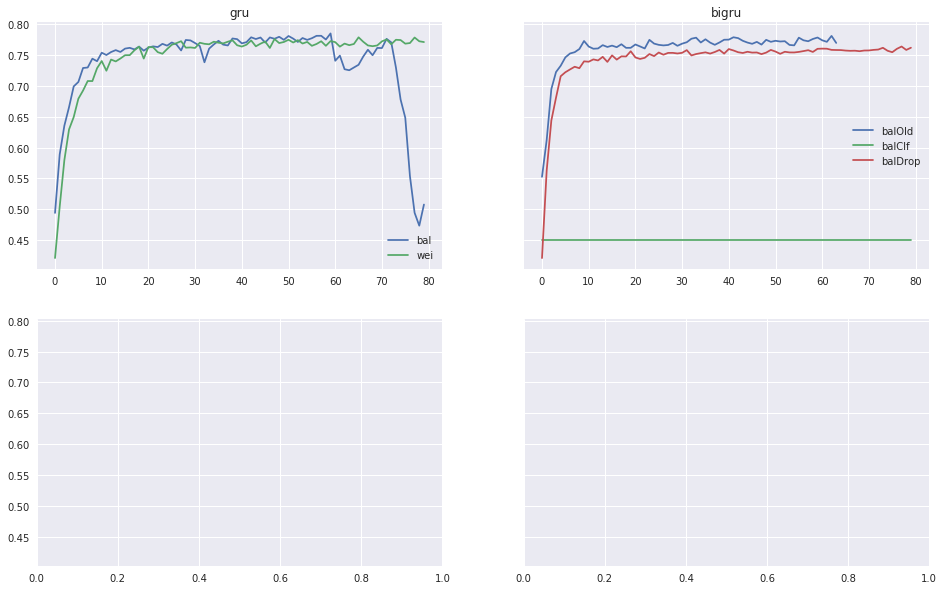

In [26]:
f, ax = plt.subplots(2,2,figsize=(16, 10), sharey=True)
for i, key in enumerate(models):
    for subkey in models[key]:
        r, c = i // 2, i%2
        ax[r,c].set_title(key)
        ax[r,c].plot(models[key][subkey], label = subkey)
        ax[r,c].legend()

In [ ]:
# f, ax = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
# for i, key in enumerate(folders):
#     r, c = i // 2, i%2
#     ax[r,c].set_title(key)
#     for subkey in approach[key]:
#         ax[r,c].plot(approach[key][subkey], label = subkey)
#         ax[r,c].legend()